https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import random
import numpy as np

random.seed(34)
np.random.seed(34)

In [5]:
from utils import *

In [4]:
X_train, y_train = generate_dataset(directory='./TrainingData', MAX_LEN=170)

In [5]:
X_test, y_test = generate_dataset(directory='./TestingData', MAX_LEN=170)

In [6]:
X_train.shape

(120, 170, 33)

In [7]:
X_test.shape

(40, 170, 33)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## Hyperparameter Fine-tuning

In [13]:
best_model = None
best_history = None
best_acc = 0

learning_rates = [1e-4, 1e-3, 2e-3, 2.5e-3, 1e-2]
dropouts = [0.1, 0.2, 0.3, 0.35, 0.4, 0.5]
epochs = [20, 30, 40, 50, 60, 70]

results = pd.DataFrame(columns=['Learning Rate', 'Dropout', 'Epochs', 'Accuracy'])

for lr in learning_rates:
    for dp in dropouts:
        for ep in epochs:
            model = models.Sequential([
                layers.Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
                layers.MaxPooling1D(pool_size=2),
                layers.Conv1D(32, kernel_size=3, activation='relu'),
                layers.MaxPooling1D(pool_size=2),
                layers.Flatten(),
                layers.Dense(32, activation='relu', kernel_regularizer='l2'),
                layers.Dropout(dp),
                layers.Dense(1, activation='sigmoid')
            ])
            
            model.compile(optimizer=Adam(learning_rate=2e-3), loss='mean_squared_error', metrics=['accuracy'])

            history = model.fit(
                X_train, y_train,
                epochs=50,
                batch_size=16,
                validation_split=0.2,
                verbose=0
            )

            test_loss, test_accuracy = model.evaluate(X_test, y_test)
            print(f"Learning Rate: {lr}, Dropout: {dp}, Epochs: {ep}")
            print(f"Test Accuracy: {test_accuracy:.2f}")

            new_row = pd.DataFrame({
                'Learning Rate': [lr],
                'Dropout': [dp],
                'Epochs': [ep],
                'Accuracy': [test_accuracy]
            })
            results = pd.concat([results, new_row], ignore_index=True)

            if test_accuracy > best_acc:
                best_model = model
                best_history = history
                best_acc = test_accuracy

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7229 - loss: 0.2043
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 20
Test Accuracy: 0.73
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7125 - loss: 0.2199
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 30
Test Accuracy: 0.73
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6479 - loss: 0.2794
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 40
Test Accuracy: 0.68
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7125 - loss: 0.2498
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 50
Test Accuracy: 0.73
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7667 - loss: 0.1884
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 60
Test Accuracy: 0.77
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7229 - loss: 0.2094
Learning Rate: 0.0001, Dropout: 0.1, Epochs: 70
Test Accuracy: 0.73
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6792 - loss: 0.2293
Learning Rate: 0.0001, Dropout: 0.2, Epochs: 20
Test Accuracy: 0.68
2/2 ━━━━━━━━━━━━━━━━

In [14]:
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.86      0.95      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [15]:
def plot_training_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

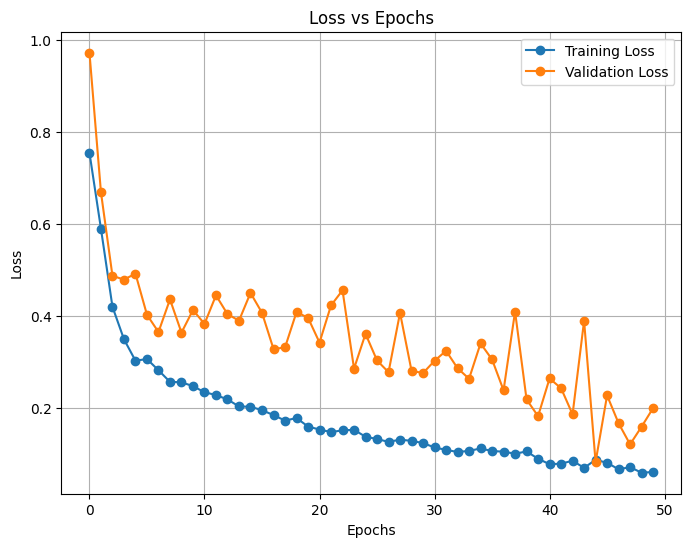

In [16]:
plot_training_history(best_history)

In [ ]:
html_table = results.to_html(index=False, classes='table table-striped')
with open("table.html", "w") as f:
    f.write(html_table)

In [7]:
import pandas as pd

In [21]:
import seaborn as sns

In [18]:
# loading the results table
result_table = pd.read_html("table.html")

print(f"Number of tables: {len(result_table)}")

df = result_table[0]

print(df)

Number of tables: 1
     Learning Rate  Dropout  Epochs  Accuracy
0           0.0001      0.1      20     0.725
1           0.0001      0.1      30     0.725
2           0.0001      0.1      40     0.675
3           0.0001      0.1      50     0.725
4           0.0001      0.1      60     0.775
..             ...      ...     ...       ...
175         0.0100      0.5      30     0.775
176         0.0100      0.5      40     0.725
177         0.0100      0.5      50     0.675
178         0.0100      0.5      60     0.775
179         0.0100      0.5      70     0.775

[180 rows x 4 columns]


In [19]:
df.to_csv("hyperparam_results.csv", index=False)

In [26]:
# Loading the CSV file
df = pd.read_csv("hyperparam_results.csv")

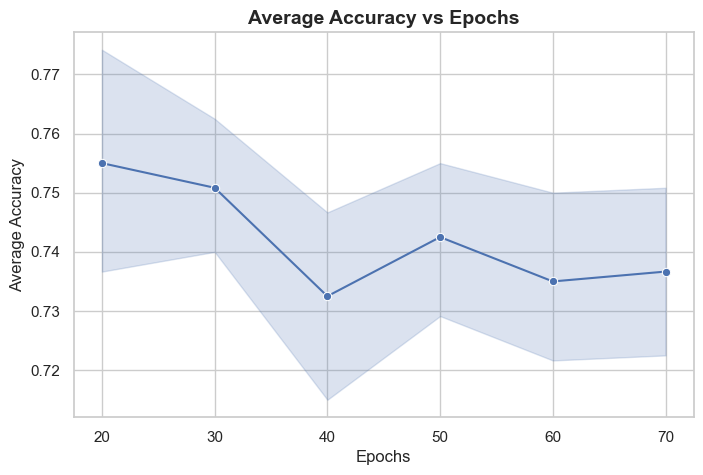

In [35]:
# The following graph shows the average accuracy for each epoch

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="Epochs", y="Accuracy", marker="o", color="b")
plt.title("Average Accuracy vs Epochs", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.show()

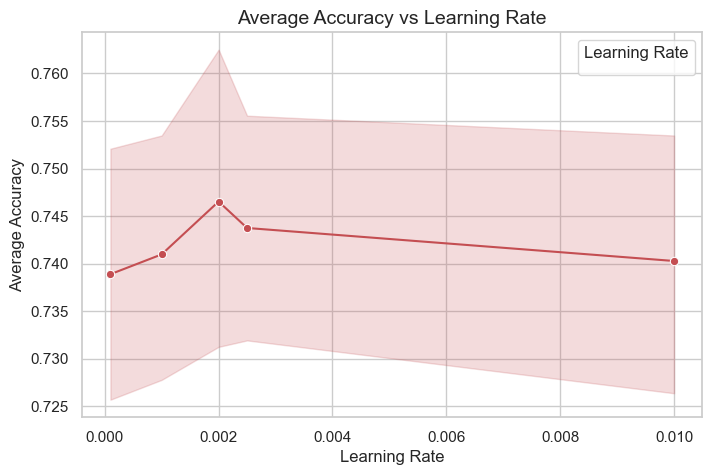

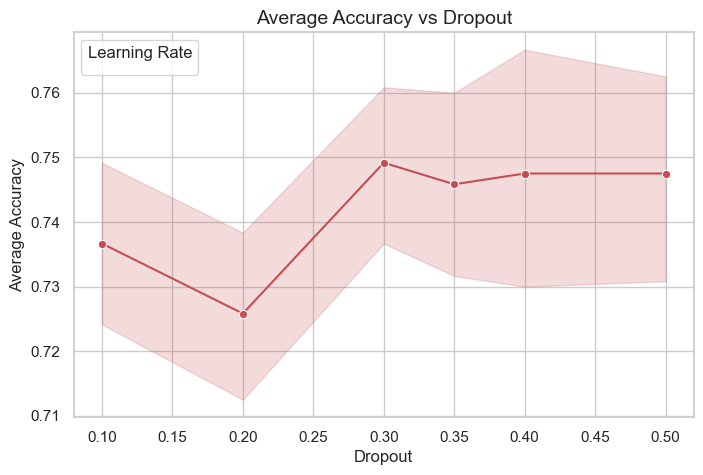

In [68]:
# The following two graphs show the average accuracy for each learning rate and dropout

plt.figure(figsize=(8, 5))
sns.lineplot(data = df, x="Learning Rate", y="Accuracy", marker="o", color="r")
plt.title("Average Accuracy vs Learning Rate", fontsize=14)
plt.xlabel("Learning Rate")
plt.ylabel("Average Accuracy")
plt.legend(title="Learning Rate")
plt.show()

plt.figure(figsize=(8, 5))
sns.lineplot(data = df, x="Dropout", y="Accuracy", marker="o", color="r")
plt.title("Average Accuracy vs Dropout", fontsize=14)
plt.xlabel("Dropout")
plt.ylabel("Average Accuracy")
plt.legend(title="Learning Rate")
plt.show()